# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 2.9MB/s eta 0:00:01    82% |██████████████████████████▍     | 12.0MB 30.5MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

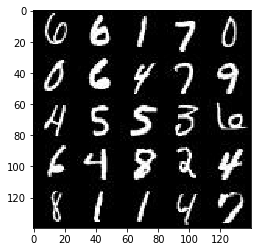

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

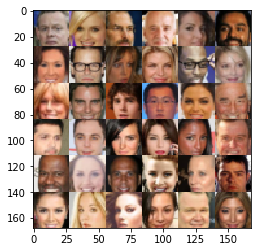

In [4]:
show_n_images = 36

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    

    # TODO: Implement Function
    real_dim = image_width*image_height

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.17
    
    with tf.variable_scope('generator',reuse=not is_train):
        # First fully connected layer
        x0 = tf.layers.dense(z, 7*7*512)
        
        # Reshape it to start the convolutional stack
        x0 = tf.reshape(x0, (-1, 7, 7, 512))
        x0 = tf.layers.batch_normalization(x0, training=is_train)
        x0 = tf.maximum(alpha * x0, x0)
        # 7x7x512 now
        
        # Reshape it to start the convolutional stack
        x1 = tf.layers.conv2d_transpose(x0, 256, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 14x14x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 28x28x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, l_r = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, l_r, beta1)
    samples, losses = [], []
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images *= 2
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_r: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, l_r: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)


    return losses, samples
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0112... Generator Loss: 7.7668
Epoch 1/2... Discriminator Loss: 0.2172... Generator Loss: 2.9553
Epoch 1/2... Discriminator Loss: 3.5858... Generator Loss: 1.1179
Epoch 1/2... Discriminator Loss: 4.5489... Generator Loss: 0.0405
Epoch 1/2... Discriminator Loss: 2.2745... Generator Loss: 0.1950
Epoch 1/2... Discriminator Loss: 2.0809... Generator Loss: 1.2867
Epoch 1/2... Discriminator Loss: 1.2052... Generator Loss: 1.5270
Epoch 1/2... Discriminator Loss: 2.2647... Generator Loss: 0.1954
Epoch 1/2... Discriminator Loss: 1.9334... Generator Loss: 0.2258
Epoch 1/2... Discriminator Loss: 1.2786... Generator Loss: 0.9753


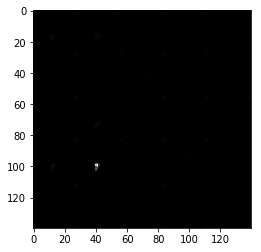

Epoch 1/2... Discriminator Loss: 1.3171... Generator Loss: 0.5702
Epoch 1/2... Discriminator Loss: 1.7889... Generator Loss: 0.2537
Epoch 1/2... Discriminator Loss: 1.2119... Generator Loss: 0.6913
Epoch 1/2... Discriminator Loss: 1.4852... Generator Loss: 0.4452
Epoch 1/2... Discriminator Loss: 1.3108... Generator Loss: 0.6256
Epoch 1/2... Discriminator Loss: 1.6213... Generator Loss: 0.7990
Epoch 1/2... Discriminator Loss: 1.5168... Generator Loss: 0.3397
Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.9087
Epoch 1/2... Discriminator Loss: 1.5571... Generator Loss: 0.3502
Epoch 1/2... Discriminator Loss: 1.4011... Generator Loss: 0.4773


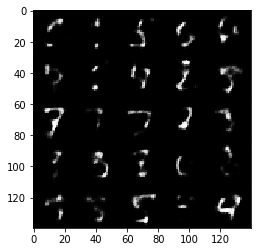

Epoch 1/2... Discriminator Loss: 1.4696... Generator Loss: 0.8743
Epoch 1/2... Discriminator Loss: 1.4955... Generator Loss: 1.3361
Epoch 1/2... Discriminator Loss: 1.7396... Generator Loss: 0.3362
Epoch 1/2... Discriminator Loss: 1.5898... Generator Loss: 0.5618
Epoch 1/2... Discriminator Loss: 1.6538... Generator Loss: 0.2833
Epoch 1/2... Discriminator Loss: 1.3153... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.5109... Generator Loss: 0.4118
Epoch 1/2... Discriminator Loss: 1.3427... Generator Loss: 0.5606
Epoch 1/2... Discriminator Loss: 1.5382... Generator Loss: 0.4260
Epoch 1/2... Discriminator Loss: 1.4361... Generator Loss: 1.1957


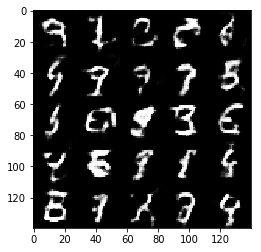

Epoch 1/2... Discriminator Loss: 1.3730... Generator Loss: 0.6058
Epoch 1/2... Discriminator Loss: 1.5459... Generator Loss: 0.3379
Epoch 1/2... Discriminator Loss: 1.5009... Generator Loss: 0.4907
Epoch 1/2... Discriminator Loss: 1.4115... Generator Loss: 0.5506
Epoch 1/2... Discriminator Loss: 1.2519... Generator Loss: 0.7301
Epoch 1/2... Discriminator Loss: 1.5308... Generator Loss: 0.5569
Epoch 1/2... Discriminator Loss: 1.4963... Generator Loss: 0.3629
Epoch 1/2... Discriminator Loss: 1.4630... Generator Loss: 0.5245
Epoch 1/2... Discriminator Loss: 1.1091... Generator Loss: 0.9449
Epoch 1/2... Discriminator Loss: 1.2025... Generator Loss: 0.7763


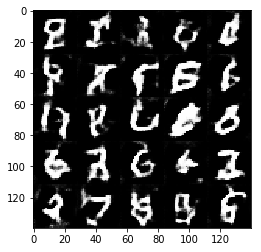

Epoch 1/2... Discriminator Loss: 1.2947... Generator Loss: 0.4969
Epoch 1/2... Discriminator Loss: 1.1516... Generator Loss: 0.9907
Epoch 1/2... Discriminator Loss: 1.5149... Generator Loss: 0.4276
Epoch 1/2... Discriminator Loss: 1.6634... Generator Loss: 1.3153
Epoch 1/2... Discriminator Loss: 1.4319... Generator Loss: 1.1018
Epoch 1/2... Discriminator Loss: 1.3141... Generator Loss: 0.6837
Epoch 1/2... Discriminator Loss: 1.6580... Generator Loss: 0.3150
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.7399
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 1.1507
Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 0.8729


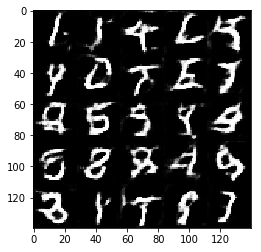

Epoch 1/2... Discriminator Loss: 1.7624... Generator Loss: 0.2535
Epoch 1/2... Discriminator Loss: 1.4275... Generator Loss: 0.4852
Epoch 1/2... Discriminator Loss: 1.3065... Generator Loss: 0.4861
Epoch 1/2... Discriminator Loss: 1.4176... Generator Loss: 0.4704
Epoch 1/2... Discriminator Loss: 1.4182... Generator Loss: 0.5260
Epoch 1/2... Discriminator Loss: 1.5927... Generator Loss: 1.2645
Epoch 1/2... Discriminator Loss: 1.4984... Generator Loss: 0.3818
Epoch 1/2... Discriminator Loss: 1.3139... Generator Loss: 0.6627
Epoch 1/2... Discriminator Loss: 1.3122... Generator Loss: 0.5917
Epoch 1/2... Discriminator Loss: 1.7850... Generator Loss: 1.7494


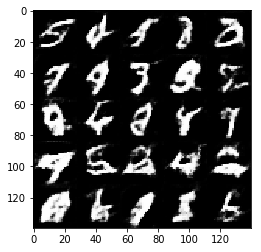

Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 1.0916
Epoch 1/2... Discriminator Loss: 1.4552... Generator Loss: 0.6001
Epoch 1/2... Discriminator Loss: 1.4539... Generator Loss: 0.4603
Epoch 1/2... Discriminator Loss: 1.2233... Generator Loss: 0.6652
Epoch 1/2... Discriminator Loss: 1.5386... Generator Loss: 0.3303
Epoch 1/2... Discriminator Loss: 1.2378... Generator Loss: 0.6509
Epoch 1/2... Discriminator Loss: 1.4911... Generator Loss: 0.4185
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 0.7169
Epoch 1/2... Discriminator Loss: 1.1219... Generator Loss: 1.0396
Epoch 1/2... Discriminator Loss: 1.2373... Generator Loss: 0.7065


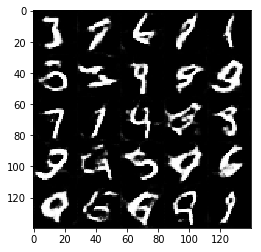

Epoch 1/2... Discriminator Loss: 1.4145... Generator Loss: 0.6149
Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 0.7359
Epoch 1/2... Discriminator Loss: 1.2587... Generator Loss: 1.2380
Epoch 1/2... Discriminator Loss: 1.2453... Generator Loss: 0.6015
Epoch 1/2... Discriminator Loss: 1.3714... Generator Loss: 0.6308
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 0.6371
Epoch 1/2... Discriminator Loss: 1.3894... Generator Loss: 0.4558
Epoch 1/2... Discriminator Loss: 1.4035... Generator Loss: 0.9164
Epoch 1/2... Discriminator Loss: 1.0527... Generator Loss: 0.8613
Epoch 1/2... Discriminator Loss: 1.3796... Generator Loss: 0.4233


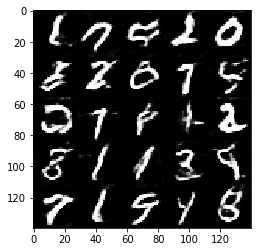

Epoch 1/2... Discriminator Loss: 1.2664... Generator Loss: 0.9255
Epoch 1/2... Discriminator Loss: 1.1949... Generator Loss: 0.7509
Epoch 1/2... Discriminator Loss: 1.4610... Generator Loss: 0.3493
Epoch 1/2... Discriminator Loss: 1.4086... Generator Loss: 0.8417
Epoch 1/2... Discriminator Loss: 1.3303... Generator Loss: 0.4773
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 1.2191... Generator Loss: 0.6918
Epoch 1/2... Discriminator Loss: 1.6134... Generator Loss: 0.2903
Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.4814
Epoch 1/2... Discriminator Loss: 1.5609... Generator Loss: 0.3343


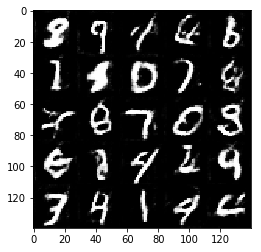

Epoch 1/2... Discriminator Loss: 1.2679... Generator Loss: 0.5631
Epoch 1/2... Discriminator Loss: 1.4117... Generator Loss: 1.3025
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.5723
Epoch 1/2... Discriminator Loss: 1.2990... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 1.2791... Generator Loss: 0.4655
Epoch 1/2... Discriminator Loss: 1.3747... Generator Loss: 1.1192
Epoch 1/2... Discriminator Loss: 1.1350... Generator Loss: 1.4219
Epoch 1/2... Discriminator Loss: 1.0206... Generator Loss: 0.9148
Epoch 1/2... Discriminator Loss: 1.4721... Generator Loss: 0.3930
Epoch 1/2... Discriminator Loss: 1.1795... Generator Loss: 0.4935


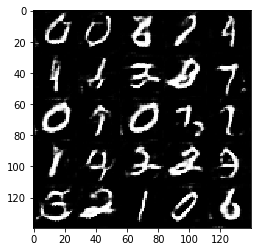

Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 0.5096
Epoch 1/2... Discriminator Loss: 1.1649... Generator Loss: 0.8340
Epoch 1/2... Discriminator Loss: 1.4682... Generator Loss: 0.4703
Epoch 1/2... Discriminator Loss: 1.4890... Generator Loss: 0.3983
Epoch 1/2... Discriminator Loss: 1.4391... Generator Loss: 0.4055
Epoch 1/2... Discriminator Loss: 1.7081... Generator Loss: 0.3283
Epoch 1/2... Discriminator Loss: 1.1534... Generator Loss: 1.0274
Epoch 1/2... Discriminator Loss: 2.0771... Generator Loss: 0.1693
Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.9485
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 0.5565


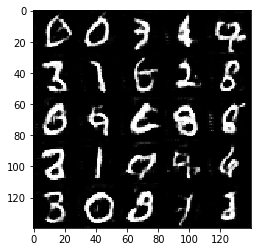

Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 0.3838
Epoch 1/2... Discriminator Loss: 1.1352... Generator Loss: 0.9017
Epoch 1/2... Discriminator Loss: 0.9568... Generator Loss: 1.1683
Epoch 1/2... Discriminator Loss: 1.4103... Generator Loss: 0.5212
Epoch 1/2... Discriminator Loss: 1.0495... Generator Loss: 0.7647
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.6845
Epoch 1/2... Discriminator Loss: 1.0389... Generator Loss: 0.7792
Epoch 1/2... Discriminator Loss: 1.1900... Generator Loss: 0.7264
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 0.4758
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 0.8636


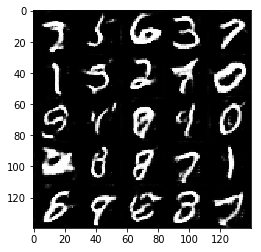

Epoch 1/2... Discriminator Loss: 1.3456... Generator Loss: 1.0053
Epoch 1/2... Discriminator Loss: 1.3903... Generator Loss: 0.8302
Epoch 1/2... Discriminator Loss: 1.2615... Generator Loss: 0.4725
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 0.9927
Epoch 1/2... Discriminator Loss: 1.1621... Generator Loss: 1.1756
Epoch 1/2... Discriminator Loss: 1.2815... Generator Loss: 0.7276
Epoch 1/2... Discriminator Loss: 0.9609... Generator Loss: 1.0018
Epoch 1/2... Discriminator Loss: 1.3787... Generator Loss: 0.4204
Epoch 1/2... Discriminator Loss: 1.2476... Generator Loss: 0.6777
Epoch 1/2... Discriminator Loss: 1.0078... Generator Loss: 1.0045


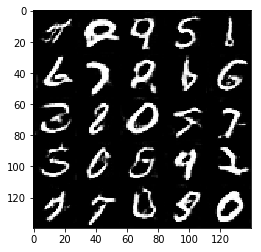

Epoch 1/2... Discriminator Loss: 1.4521... Generator Loss: 0.4549
Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 0.4677
Epoch 1/2... Discriminator Loss: 1.1646... Generator Loss: 1.3329
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.4641
Epoch 1/2... Discriminator Loss: 1.2204... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 0.5363
Epoch 1/2... Discriminator Loss: 1.6049... Generator Loss: 0.3541
Epoch 1/2... Discriminator Loss: 1.2837... Generator Loss: 1.0176
Epoch 1/2... Discriminator Loss: 0.9415... Generator Loss: 0.8242
Epoch 1/2... Discriminator Loss: 1.2935... Generator Loss: 0.4768


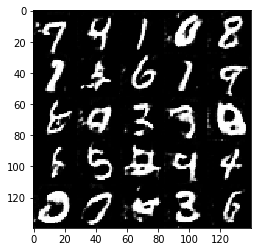

Epoch 1/2... Discriminator Loss: 1.3768... Generator Loss: 0.4546
Epoch 1/2... Discriminator Loss: 1.1184... Generator Loss: 1.6188
Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 1.2575
Epoch 1/2... Discriminator Loss: 1.0854... Generator Loss: 0.6803
Epoch 1/2... Discriminator Loss: 1.1465... Generator Loss: 0.7061
Epoch 1/2... Discriminator Loss: 1.3776... Generator Loss: 0.4464
Epoch 1/2... Discriminator Loss: 1.3569... Generator Loss: 1.1960
Epoch 1/2... Discriminator Loss: 1.1328... Generator Loss: 0.6512
Epoch 1/2... Discriminator Loss: 1.0753... Generator Loss: 1.2099
Epoch 1/2... Discriminator Loss: 1.2195... Generator Loss: 0.5761


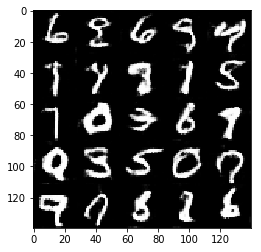

Epoch 1/2... Discriminator Loss: 1.3352... Generator Loss: 0.5469
Epoch 1/2... Discriminator Loss: 1.5894... Generator Loss: 0.3106
Epoch 1/2... Discriminator Loss: 1.3166... Generator Loss: 0.4393
Epoch 1/2... Discriminator Loss: 1.3533... Generator Loss: 0.5601
Epoch 1/2... Discriminator Loss: 1.8162... Generator Loss: 0.2687
Epoch 1/2... Discriminator Loss: 1.1876... Generator Loss: 0.5382
Epoch 1/2... Discriminator Loss: 0.9884... Generator Loss: 0.6858
Epoch 1/2... Discriminator Loss: 1.3413... Generator Loss: 0.3860
Epoch 1/2... Discriminator Loss: 1.0654... Generator Loss: 0.8415
Epoch 1/2... Discriminator Loss: 1.5597... Generator Loss: 1.4166


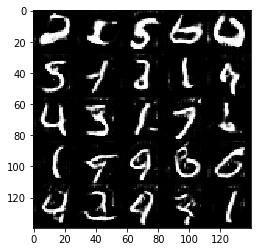

Epoch 1/2... Discriminator Loss: 1.1665... Generator Loss: 0.5305
Epoch 1/2... Discriminator Loss: 1.3853... Generator Loss: 0.4735
Epoch 1/2... Discriminator Loss: 1.2637... Generator Loss: 1.0578
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 0.6901
Epoch 1/2... Discriminator Loss: 0.9003... Generator Loss: 0.9975
Epoch 1/2... Discriminator Loss: 0.9781... Generator Loss: 0.7471
Epoch 1/2... Discriminator Loss: 1.7721... Generator Loss: 0.2430
Epoch 1/2... Discriminator Loss: 1.2855... Generator Loss: 0.7716
Epoch 1/2... Discriminator Loss: 1.2224... Generator Loss: 0.6250
Epoch 1/2... Discriminator Loss: 1.2281... Generator Loss: 0.5256


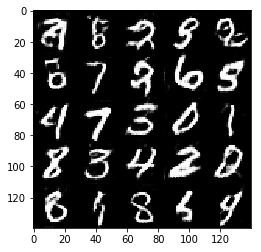

Epoch 1/2... Discriminator Loss: 1.3704... Generator Loss: 0.9846
Epoch 1/2... Discriminator Loss: 1.0121... Generator Loss: 0.7847
Epoch 1/2... Discriminator Loss: 1.2917... Generator Loss: 0.4602
Epoch 1/2... Discriminator Loss: 1.1948... Generator Loss: 0.5703
Epoch 1/2... Discriminator Loss: 1.1203... Generator Loss: 0.5736
Epoch 1/2... Discriminator Loss: 0.5405... Generator Loss: 1.8693
Epoch 1/2... Discriminator Loss: 1.7158... Generator Loss: 2.5715
Epoch 1/2... Discriminator Loss: 1.3408... Generator Loss: 0.4469
Epoch 1/2... Discriminator Loss: 1.1677... Generator Loss: 0.5817
Epoch 1/2... Discriminator Loss: 1.1963... Generator Loss: 0.6250


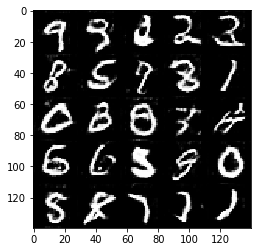

Epoch 1/2... Discriminator Loss: 1.2283... Generator Loss: 0.5380
Epoch 1/2... Discriminator Loss: 1.0420... Generator Loss: 0.7757
Epoch 1/2... Discriminator Loss: 1.1034... Generator Loss: 0.6380
Epoch 1/2... Discriminator Loss: 1.6804... Generator Loss: 0.2864
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 0.4839
Epoch 1/2... Discriminator Loss: 1.0025... Generator Loss: 0.8749
Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.5637
Epoch 2/2... Discriminator Loss: 1.6780... Generator Loss: 2.0895
Epoch 2/2... Discriminator Loss: 0.9246... Generator Loss: 0.8617
Epoch 2/2... Discriminator Loss: 1.0453... Generator Loss: 0.7610


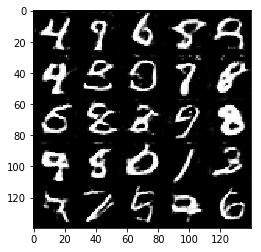

Epoch 2/2... Discriminator Loss: 0.9544... Generator Loss: 1.3990
Epoch 2/2... Discriminator Loss: 1.2526... Generator Loss: 1.5850
Epoch 2/2... Discriminator Loss: 1.1770... Generator Loss: 0.5540
Epoch 2/2... Discriminator Loss: 1.3180... Generator Loss: 0.4564
Epoch 2/2... Discriminator Loss: 0.8789... Generator Loss: 1.1004
Epoch 2/2... Discriminator Loss: 1.1093... Generator Loss: 0.7437
Epoch 2/2... Discriminator Loss: 0.9515... Generator Loss: 0.7232
Epoch 2/2... Discriminator Loss: 1.1246... Generator Loss: 1.3085
Epoch 2/2... Discriminator Loss: 1.7494... Generator Loss: 0.3070
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 0.9959


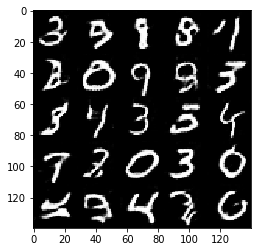

Epoch 2/2... Discriminator Loss: 1.0194... Generator Loss: 0.5960
Epoch 2/2... Discriminator Loss: 1.0234... Generator Loss: 0.9663
Epoch 2/2... Discriminator Loss: 1.0710... Generator Loss: 1.7698
Epoch 2/2... Discriminator Loss: 1.0864... Generator Loss: 0.6623
Epoch 2/2... Discriminator Loss: 1.1165... Generator Loss: 0.6277
Epoch 2/2... Discriminator Loss: 1.7562... Generator Loss: 0.2639
Epoch 2/2... Discriminator Loss: 1.9955... Generator Loss: 0.2346
Epoch 2/2... Discriminator Loss: 1.1194... Generator Loss: 1.4179
Epoch 2/2... Discriminator Loss: 0.9350... Generator Loss: 1.1864
Epoch 2/2... Discriminator Loss: 1.1217... Generator Loss: 0.6909


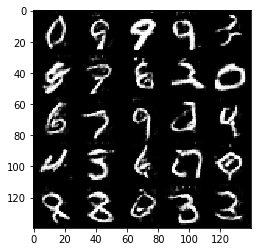

Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 1.3989
Epoch 2/2... Discriminator Loss: 1.4198... Generator Loss: 0.4312
Epoch 2/2... Discriminator Loss: 1.1813... Generator Loss: 0.6197
Epoch 2/2... Discriminator Loss: 2.0252... Generator Loss: 0.1913
Epoch 2/2... Discriminator Loss: 1.1146... Generator Loss: 0.5969
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 0.6546
Epoch 2/2... Discriminator Loss: 1.0643... Generator Loss: 1.1946
Epoch 2/2... Discriminator Loss: 1.1479... Generator Loss: 0.7766
Epoch 2/2... Discriminator Loss: 0.9280... Generator Loss: 0.8668
Epoch 2/2... Discriminator Loss: 1.2851... Generator Loss: 0.4780


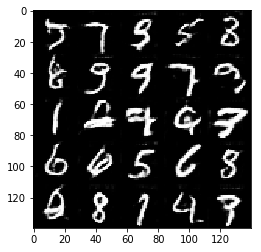

Epoch 2/2... Discriminator Loss: 1.1354... Generator Loss: 1.0376
Epoch 2/2... Discriminator Loss: 1.0146... Generator Loss: 1.2144
Epoch 2/2... Discriminator Loss: 1.1123... Generator Loss: 0.6698
Epoch 2/2... Discriminator Loss: 1.0619... Generator Loss: 0.6901
Epoch 2/2... Discriminator Loss: 1.3000... Generator Loss: 1.7409
Epoch 2/2... Discriminator Loss: 0.6596... Generator Loss: 1.1190
Epoch 2/2... Discriminator Loss: 1.8427... Generator Loss: 0.2292
Epoch 2/2... Discriminator Loss: 1.0194... Generator Loss: 0.6993
Epoch 2/2... Discriminator Loss: 1.0619... Generator Loss: 0.6196
Epoch 2/2... Discriminator Loss: 1.7603... Generator Loss: 0.2567


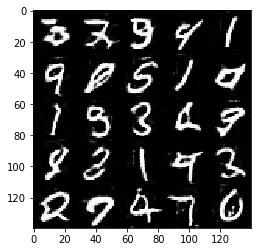

Epoch 2/2... Discriminator Loss: 0.7954... Generator Loss: 2.0782
Epoch 2/2... Discriminator Loss: 1.4042... Generator Loss: 0.4445
Epoch 2/2... Discriminator Loss: 1.0353... Generator Loss: 0.6853
Epoch 2/2... Discriminator Loss: 1.0847... Generator Loss: 0.6304
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 1.0526
Epoch 2/2... Discriminator Loss: 0.7928... Generator Loss: 1.0097
Epoch 2/2... Discriminator Loss: 0.8189... Generator Loss: 1.4526
Epoch 2/2... Discriminator Loss: 1.0976... Generator Loss: 1.6335
Epoch 2/2... Discriminator Loss: 1.1953... Generator Loss: 0.8724
Epoch 2/2... Discriminator Loss: 0.8324... Generator Loss: 0.9468


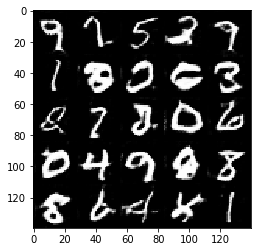

Epoch 2/2... Discriminator Loss: 1.1777... Generator Loss: 1.0450
Epoch 2/2... Discriminator Loss: 1.0432... Generator Loss: 0.7087
Epoch 2/2... Discriminator Loss: 0.8738... Generator Loss: 0.7713
Epoch 2/2... Discriminator Loss: 1.3061... Generator Loss: 0.4314
Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 0.5113
Epoch 2/2... Discriminator Loss: 0.9021... Generator Loss: 1.1885
Epoch 2/2... Discriminator Loss: 1.0772... Generator Loss: 0.5396
Epoch 2/2... Discriminator Loss: 1.5674... Generator Loss: 0.3572
Epoch 2/2... Discriminator Loss: 1.5834... Generator Loss: 0.3141
Epoch 2/2... Discriminator Loss: 1.5222... Generator Loss: 0.3329


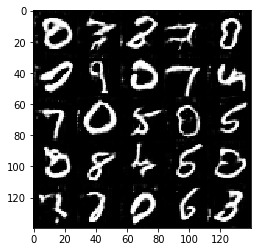

Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 1.4669
Epoch 2/2... Discriminator Loss: 1.2382... Generator Loss: 0.4823
Epoch 2/2... Discriminator Loss: 0.9028... Generator Loss: 0.8810
Epoch 2/2... Discriminator Loss: 0.9393... Generator Loss: 0.7077
Epoch 2/2... Discriminator Loss: 1.6270... Generator Loss: 0.3260
Epoch 2/2... Discriminator Loss: 1.5332... Generator Loss: 0.3929
Epoch 2/2... Discriminator Loss: 1.6960... Generator Loss: 0.2667
Epoch 2/2... Discriminator Loss: 1.5698... Generator Loss: 0.3211
Epoch 2/2... Discriminator Loss: 0.8060... Generator Loss: 1.5657
Epoch 2/2... Discriminator Loss: 1.1564... Generator Loss: 0.6471


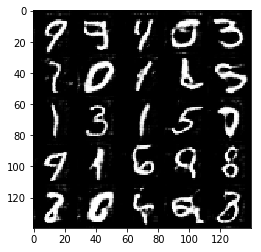

Epoch 2/2... Discriminator Loss: 0.8175... Generator Loss: 1.5018
Epoch 2/2... Discriminator Loss: 1.3362... Generator Loss: 0.4926
Epoch 2/2... Discriminator Loss: 1.8589... Generator Loss: 0.2414
Epoch 2/2... Discriminator Loss: 1.4994... Generator Loss: 0.3632
Epoch 2/2... Discriminator Loss: 1.0092... Generator Loss: 0.9495
Epoch 2/2... Discriminator Loss: 0.7858... Generator Loss: 1.0371
Epoch 2/2... Discriminator Loss: 1.0321... Generator Loss: 0.8414
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 0.5357
Epoch 2/2... Discriminator Loss: 0.7827... Generator Loss: 1.0277
Epoch 2/2... Discriminator Loss: 1.0442... Generator Loss: 2.0275


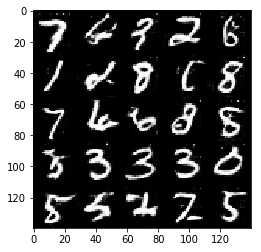

Epoch 2/2... Discriminator Loss: 0.8900... Generator Loss: 1.4829
Epoch 2/2... Discriminator Loss: 1.2752... Generator Loss: 0.5883
Epoch 2/2... Discriminator Loss: 1.0214... Generator Loss: 1.0173
Epoch 2/2... Discriminator Loss: 0.9294... Generator Loss: 1.0490
Epoch 2/2... Discriminator Loss: 1.0210... Generator Loss: 1.2578
Epoch 2/2... Discriminator Loss: 1.2520... Generator Loss: 0.4668
Epoch 2/2... Discriminator Loss: 1.7214... Generator Loss: 0.2667
Epoch 2/2... Discriminator Loss: 1.0365... Generator Loss: 1.6621
Epoch 2/2... Discriminator Loss: 1.5250... Generator Loss: 0.3876
Epoch 2/2... Discriminator Loss: 1.2058... Generator Loss: 0.6732


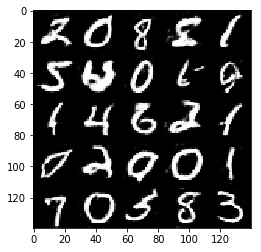

Epoch 2/2... Discriminator Loss: 0.9729... Generator Loss: 1.2408
Epoch 2/2... Discriminator Loss: 0.8070... Generator Loss: 0.8594
Epoch 2/2... Discriminator Loss: 1.1233... Generator Loss: 1.0952
Epoch 2/2... Discriminator Loss: 0.7273... Generator Loss: 1.8348
Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 0.8232
Epoch 2/2... Discriminator Loss: 1.4400... Generator Loss: 0.3969
Epoch 2/2... Discriminator Loss: 0.6876... Generator Loss: 1.3084
Epoch 2/2... Discriminator Loss: 0.7554... Generator Loss: 1.1489
Epoch 2/2... Discriminator Loss: 1.1904... Generator Loss: 0.7170
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.6500


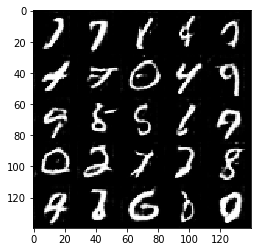

Epoch 2/2... Discriminator Loss: 0.8747... Generator Loss: 1.3314
Epoch 2/2... Discriminator Loss: 0.8399... Generator Loss: 1.2674
Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 1.2436
Epoch 2/2... Discriminator Loss: 1.4487... Generator Loss: 0.3601
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.1814
Epoch 2/2... Discriminator Loss: 0.8511... Generator Loss: 1.7199
Epoch 2/2... Discriminator Loss: 0.8166... Generator Loss: 1.4052
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 0.9986
Epoch 2/2... Discriminator Loss: 0.5152... Generator Loss: 1.2740
Epoch 2/2... Discriminator Loss: 1.8409... Generator Loss: 0.2539


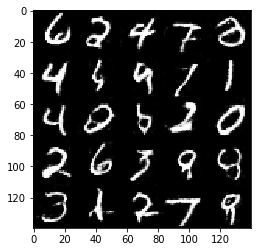

Epoch 2/2... Discriminator Loss: 1.1229... Generator Loss: 0.6426
Epoch 2/2... Discriminator Loss: 0.6735... Generator Loss: 1.0621
Epoch 2/2... Discriminator Loss: 0.6713... Generator Loss: 1.6473
Epoch 2/2... Discriminator Loss: 0.9373... Generator Loss: 1.0267
Epoch 2/2... Discriminator Loss: 0.8794... Generator Loss: 1.4167
Epoch 2/2... Discriminator Loss: 1.9801... Generator Loss: 0.2119
Epoch 2/2... Discriminator Loss: 0.8066... Generator Loss: 0.9728
Epoch 2/2... Discriminator Loss: 0.9787... Generator Loss: 1.8838
Epoch 2/2... Discriminator Loss: 0.9648... Generator Loss: 1.3642
Epoch 2/2... Discriminator Loss: 1.5782... Generator Loss: 0.3609


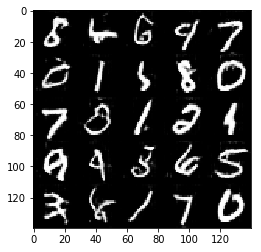

Epoch 2/2... Discriminator Loss: 1.8798... Generator Loss: 0.2578
Epoch 2/2... Discriminator Loss: 0.8505... Generator Loss: 0.7412
Epoch 2/2... Discriminator Loss: 0.7768... Generator Loss: 1.0172
Epoch 2/2... Discriminator Loss: 0.9495... Generator Loss: 1.6163
Epoch 2/2... Discriminator Loss: 0.9464... Generator Loss: 0.7456
Epoch 2/2... Discriminator Loss: 0.8545... Generator Loss: 0.9178
Epoch 2/2... Discriminator Loss: 1.0543... Generator Loss: 0.7741
Epoch 2/2... Discriminator Loss: 2.1563... Generator Loss: 0.1871
Epoch 2/2... Discriminator Loss: 1.0863... Generator Loss: 1.1195
Epoch 2/2... Discriminator Loss: 1.2539... Generator Loss: 0.4568


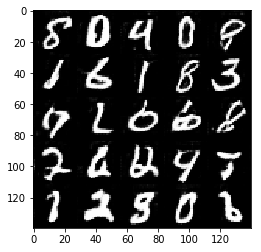

Epoch 2/2... Discriminator Loss: 1.2380... Generator Loss: 0.5756
Epoch 2/2... Discriminator Loss: 1.2477... Generator Loss: 0.4710
Epoch 2/2... Discriminator Loss: 0.9358... Generator Loss: 1.6063
Epoch 2/2... Discriminator Loss: 1.5991... Generator Loss: 0.3107
Epoch 2/2... Discriminator Loss: 1.2472... Generator Loss: 1.6338
Epoch 2/2... Discriminator Loss: 1.1637... Generator Loss: 0.6641
Epoch 2/2... Discriminator Loss: 1.5664... Generator Loss: 0.3886
Epoch 2/2... Discriminator Loss: 1.0448... Generator Loss: 1.2003
Epoch 2/2... Discriminator Loss: 0.9709... Generator Loss: 1.2431
Epoch 2/2... Discriminator Loss: 0.8530... Generator Loss: 0.9622


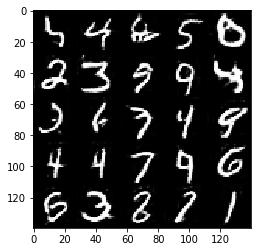

Epoch 2/2... Discriminator Loss: 1.2203... Generator Loss: 0.6211
Epoch 2/2... Discriminator Loss: 0.7371... Generator Loss: 1.1829
Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 1.0401
Epoch 2/2... Discriminator Loss: 1.7662... Generator Loss: 0.2551
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 1.7561
Epoch 2/2... Discriminator Loss: 0.8265... Generator Loss: 1.2337
Epoch 2/2... Discriminator Loss: 1.0686... Generator Loss: 0.7426
Epoch 2/2... Discriminator Loss: 1.2242... Generator Loss: 0.4648
Epoch 2/2... Discriminator Loss: 0.8525... Generator Loss: 0.8275
Epoch 2/2... Discriminator Loss: 1.1128... Generator Loss: 0.6204


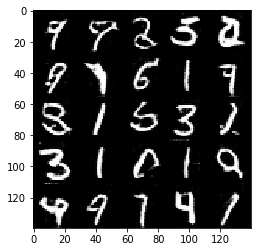

Epoch 2/2... Discriminator Loss: 1.3350... Generator Loss: 0.5440
Epoch 2/2... Discriminator Loss: 1.3488... Generator Loss: 0.4869
Epoch 2/2... Discriminator Loss: 1.2107... Generator Loss: 0.5178
Epoch 2/2... Discriminator Loss: 0.8494... Generator Loss: 1.3452
Epoch 2/2... Discriminator Loss: 1.3851... Generator Loss: 0.4477
Epoch 2/2... Discriminator Loss: 1.0670... Generator Loss: 0.8279
Epoch 2/2... Discriminator Loss: 1.2784... Generator Loss: 0.4779
Epoch 2/2... Discriminator Loss: 0.7666... Generator Loss: 1.4681
Epoch 2/2... Discriminator Loss: 1.2472... Generator Loss: 1.5472
Epoch 2/2... Discriminator Loss: 0.7640... Generator Loss: 1.1446


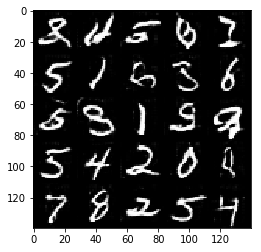

Epoch 2/2... Discriminator Loss: 0.9132... Generator Loss: 0.7326
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.3820
Epoch 2/2... Discriminator Loss: 1.4590... Generator Loss: 2.8821
Epoch 2/2... Discriminator Loss: 1.9072... Generator Loss: 0.2543
Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 1.4545
Epoch 2/2... Discriminator Loss: 1.2646... Generator Loss: 0.4787
Epoch 2/2... Discriminator Loss: 0.7470... Generator Loss: 0.8435
Epoch 2/2... Discriminator Loss: 1.2706... Generator Loss: 0.5980
Epoch 2/2... Discriminator Loss: 1.6177... Generator Loss: 1.2607
Epoch 2/2... Discriminator Loss: 1.1338... Generator Loss: 0.5812


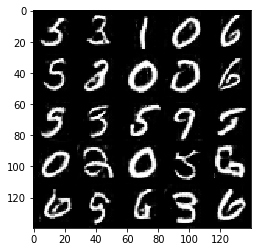

Epoch 2/2... Discriminator Loss: 0.9267... Generator Loss: 0.9432
Epoch 2/2... Discriminator Loss: 0.9906... Generator Loss: 1.6161
Epoch 2/2... Discriminator Loss: 0.9797... Generator Loss: 0.6820
Epoch 2/2... Discriminator Loss: 1.7687... Generator Loss: 0.2989
Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.1217
Epoch 2/2... Discriminator Loss: 0.6955... Generator Loss: 1.0273
Epoch 2/2... Discriminator Loss: 0.9850... Generator Loss: 0.8429
Epoch 2/2... Discriminator Loss: 0.8813... Generator Loss: 0.8093
Epoch 2/2... Discriminator Loss: 0.7034... Generator Loss: 1.3116
Epoch 2/2... Discriminator Loss: 1.1209... Generator Loss: 1.8101


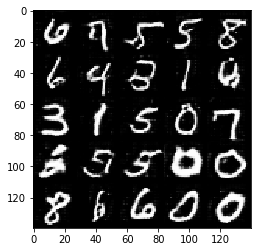

Epoch 2/2... Discriminator Loss: 1.7296... Generator Loss: 0.3595
Epoch 2/2... Discriminator Loss: 1.2695... Generator Loss: 1.8095
Epoch 2/2... Discriminator Loss: 1.1960... Generator Loss: 0.5668
Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 0.6059
Epoch 2/2... Discriminator Loss: 1.2891... Generator Loss: 0.7198


In [15]:
batch_size = 32
z_dim = 128
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 0.0100... Generator Loss: 18.4395
Epoch 1/1... Discriminator Loss: 2.4120... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 2.6832... Generator Loss: 0.2996
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.9731
Epoch 1/1... Discriminator Loss: 1.1624... Generator Loss: 1.4944
Epoch 1/1... Discriminator Loss: 1.9888... Generator Loss: 0.2050
Epoch 1/1... Discriminator Loss: 2.5462... Generator Loss: 0.1304
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 0.9636... Generator Loss: 0.7920


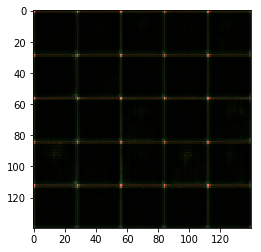

Epoch 1/1... Discriminator Loss: 0.9741... Generator Loss: 1.5416
Epoch 1/1... Discriminator Loss: 1.9919... Generator Loss: 0.2255
Epoch 1/1... Discriminator Loss: 0.9383... Generator Loss: 1.7916
Epoch 1/1... Discriminator Loss: 2.2121... Generator Loss: 0.2051
Epoch 1/1... Discriminator Loss: 1.5181... Generator Loss: 0.8616
Epoch 1/1... Discriminator Loss: 2.2799... Generator Loss: 0.1514
Epoch 1/1... Discriminator Loss: 1.6829... Generator Loss: 0.3397
Epoch 1/1... Discriminator Loss: 1.5962... Generator Loss: 0.4413
Epoch 1/1... Discriminator Loss: 1.5612... Generator Loss: 0.5833
Epoch 1/1... Discriminator Loss: 1.6380... Generator Loss: 0.3452


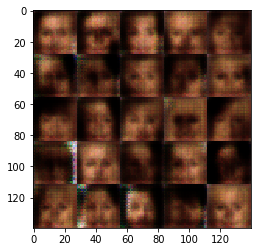

Epoch 1/1... Discriminator Loss: 1.6569... Generator Loss: 0.4644
Epoch 1/1... Discriminator Loss: 1.6631... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.5769... Generator Loss: 0.3869
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.5125
Epoch 1/1... Discriminator Loss: 1.5762... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.7790
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 1.7968
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.7822


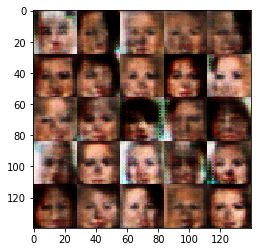

Epoch 1/1... Discriminator Loss: 1.6929... Generator Loss: 0.4280
Epoch 1/1... Discriminator Loss: 1.4968... Generator Loss: 0.4710
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.5092
Epoch 1/1... Discriminator Loss: 1.6678... Generator Loss: 0.3955
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.4645
Epoch 1/1... Discriminator Loss: 1.9987... Generator Loss: 0.2340
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.4595
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.5478... Generator Loss: 0.9527
Epoch 1/1... Discriminator Loss: 1.7846... Generator Loss: 0.3305


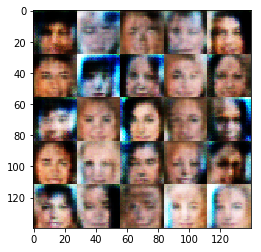

Epoch 1/1... Discriminator Loss: 1.5645... Generator Loss: 0.3763
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.4560
Epoch 1/1... Discriminator Loss: 1.9869... Generator Loss: 0.1954
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.6690... Generator Loss: 0.5181
Epoch 1/1... Discriminator Loss: 1.6186... Generator Loss: 0.3021
Epoch 1/1... Discriminator Loss: 1.6455... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.6287... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.5969... Generator Loss: 0.4124


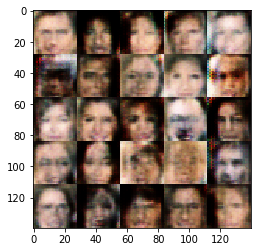

Epoch 1/1... Discriminator Loss: 1.5892... Generator Loss: 0.3611
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.6618... Generator Loss: 0.4963
Epoch 1/1... Discriminator Loss: 1.4124... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 1.3538... Generator Loss: 0.5701
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.5582
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.7374... Generator Loss: 0.2575
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.4746
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.7057


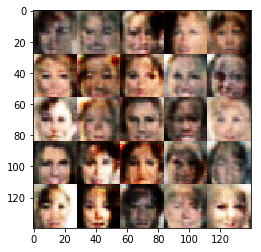

Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 0.8609
Epoch 1/1... Discriminator Loss: 1.5632... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.5938
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.5079
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.4023
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.7722


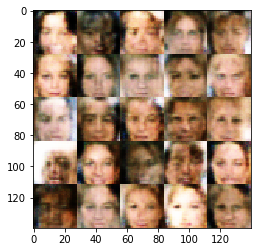

Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.5195
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.6255
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6676
Epoch 1/1... Discriminator Loss: 1.5346... Generator Loss: 0.7319
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.8870
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.5894
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 1.0961
Epoch 1/1... Discriminator Loss: 1.6783... Generator Loss: 0.5304


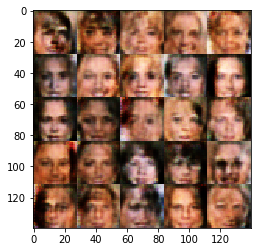

Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.6213
Epoch 1/1... Discriminator Loss: 1.5393... Generator Loss: 0.4773
Epoch 1/1... Discriminator Loss: 1.4698... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.5233... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 1.6263... Generator Loss: 0.5215
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.6501... Generator Loss: 0.5181
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.5657... Generator Loss: 0.6284


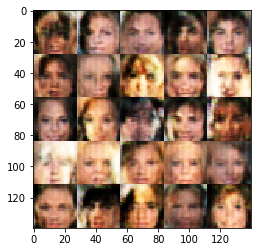

Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.6134
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.5403
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.5451... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.5964... Generator Loss: 0.5801
Epoch 1/1... Discriminator Loss: 1.4891... Generator Loss: 0.6211
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.6376


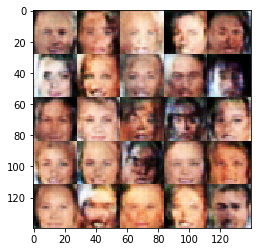

Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.6207
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.6012
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.5677
Epoch 1/1... Discriminator Loss: 1.4882... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.4710... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.8294


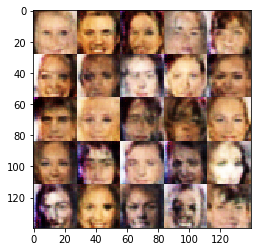

Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.4990... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6044
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.5084... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.5839
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6255
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.5718


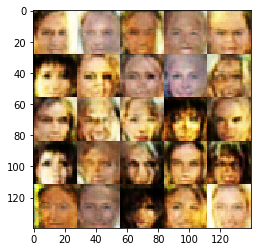

Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.5023... Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.4253... Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.5838
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.5573
Epoch 1/1... Discriminator Loss: 1.4373... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4545... Generator Loss: 0.6329
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.6785


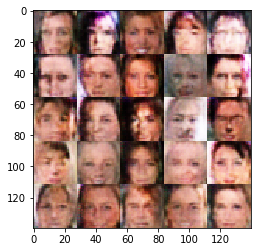

Epoch 1/1... Discriminator Loss: 1.5296... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 1.5442... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 0.5143
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.6086
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.4506


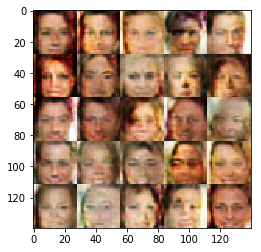

Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.5309
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.7529
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.5617
Epoch 1/1... Discriminator Loss: 1.5107... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.5429


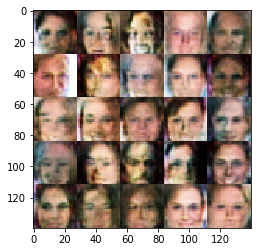

Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.6156
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.4696
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.6329
Epoch 1/1... Discriminator Loss: 1.5544... Generator Loss: 0.5364
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.4889... Generator Loss: 0.5603
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.6119
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6176


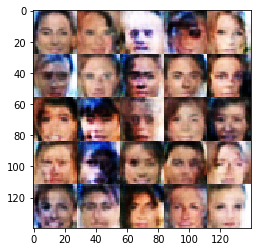

Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.6599
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.5219
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6384


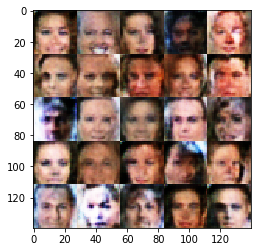

Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.4284... Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.5418... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.3912... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.6040
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.8346
Epoch 1/1... Discriminator Loss: 1.3535... Generator Loss: 0.6192


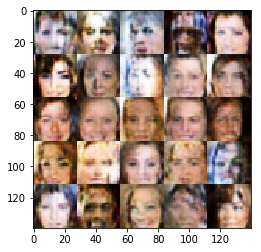

Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.5136... Generator Loss: 0.5449
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.4828... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.4373... Generator Loss: 0.4857
Epoch 1/1... Discriminator Loss: 1.6216... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.6347


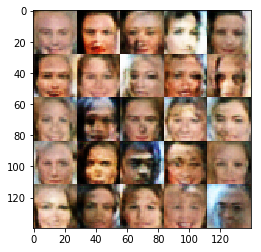

Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.4633... Generator Loss: 0.5484
Epoch 1/1... Discriminator Loss: 1.4788... Generator Loss: 0.5329
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.5160
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.5844
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.7191
Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.5114
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.5582
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.6628


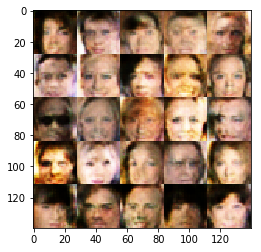

Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.5429
Epoch 1/1... Discriminator Loss: 1.3403... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.4821... Generator Loss: 0.6352


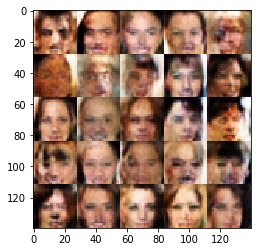

Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.5635... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.5652
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.4180... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7682


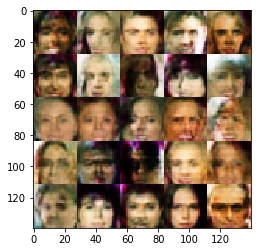

Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.5363
Epoch 1/1... Discriminator Loss: 1.3404... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.3288... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.6556... Generator Loss: 0.6330


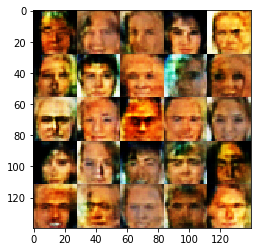

Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 1.6262... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 1.4381... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.5970


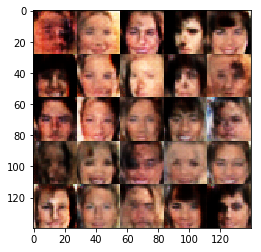

Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.5326
Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 1.4985
Epoch 1/1... Discriminator Loss: 1.5138... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.5439... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.4868... Generator Loss: 0.5697


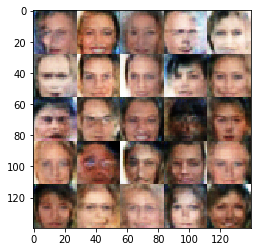

Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.6329
Epoch 1/1... Discriminator Loss: 1.4724... Generator Loss: 0.5366
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 0.4243
Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.6128


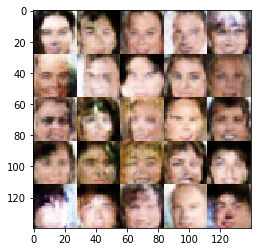

Epoch 1/1... Discriminator Loss: 1.4916... Generator Loss: 0.6213
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.5487
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.4837... Generator Loss: 0.4994
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.5905
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.5326


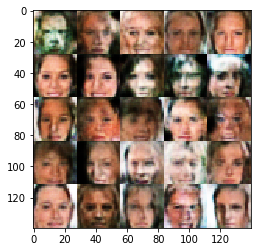

Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.4942
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.8155
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.4906
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.6314
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 1.0723
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.5254... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.8161
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.5684... Generator Loss: 1.0500


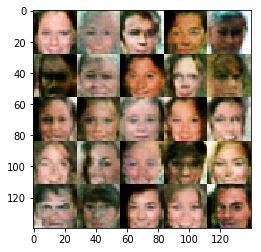

Epoch 1/1... Discriminator Loss: 1.4595... Generator Loss: 0.5465
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.5423
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.5491
Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.6441


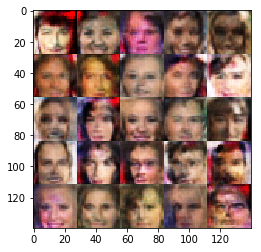

Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.4752... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.5286... Generator Loss: 0.4819
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.6123


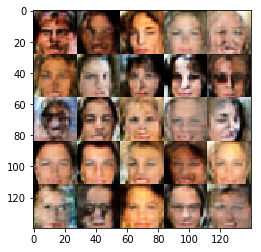

Epoch 1/1... Discriminator Loss: 1.5596... Generator Loss: 0.6066
Epoch 1/1... Discriminator Loss: 1.4948... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.4947... Generator Loss: 0.5242
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.5773... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.4771
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.5780


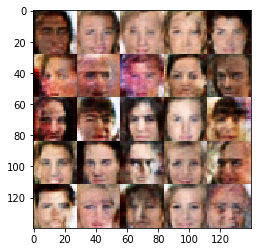

Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 0.8440
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.4532... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.5157
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.5159
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.4959... Generator Loss: 0.4023
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.7496


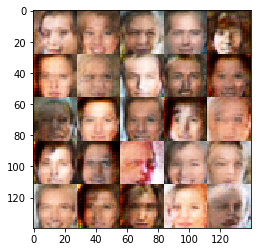

Epoch 1/1... Discriminator Loss: 1.4594... Generator Loss: 0.6011
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.5066... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.6453
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.5790
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.6222


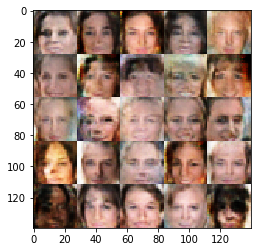

Epoch 1/1... Discriminator Loss: 1.5254... Generator Loss: 0.5111
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5062
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.5257
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.5518
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6251
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.6213
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.6442


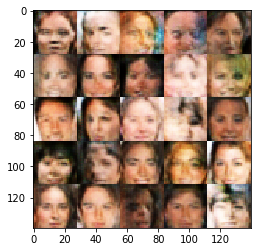

Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 1.4850... Generator Loss: 0.5246
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6096
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.5119
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.5674
Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.6232


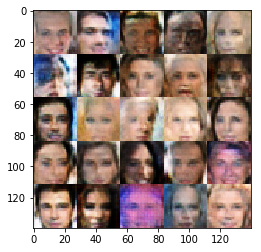

Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.6578
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.5806
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4559... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 1.4659... Generator Loss: 0.4857


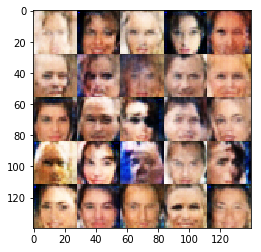

Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.5111... Generator Loss: 0.5142
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.5401... Generator Loss: 0.5200
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.5547
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.6932


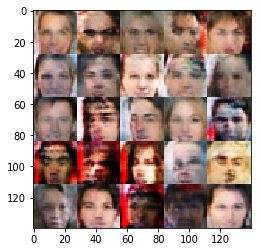

Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.4653... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.4864... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.5803
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.5631


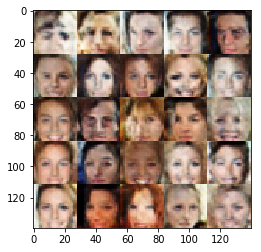

Epoch 1/1... Discriminator Loss: 1.4155... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.5636
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.5605
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.4306... Generator Loss: 0.5556
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.6460


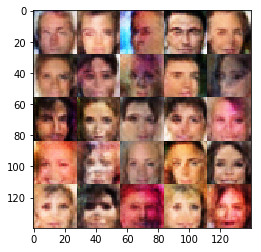

Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.7152
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.7915
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.5783
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.5279
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 0.6792


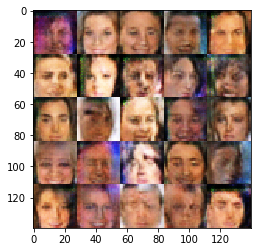

Epoch 1/1... Discriminator Loss: 1.5099... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 1.4815... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.6807


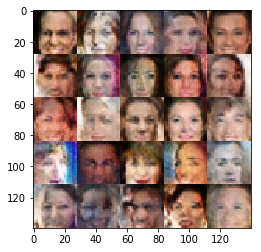

Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.4311... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.5893
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.6059
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.4840... Generator Loss: 0.4970


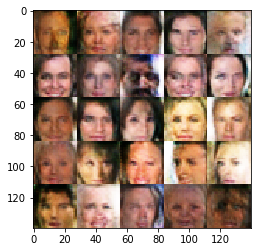

Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.6175
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.4179... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.5568
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7250


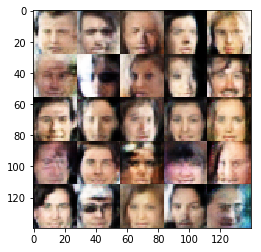

Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.5040... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.6367


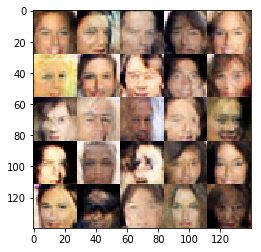

Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.4783... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.4751... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.5510
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.5170
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.6627
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.4653... Generator Loss: 0.5030


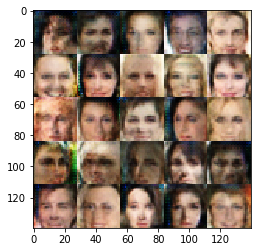

Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.5690


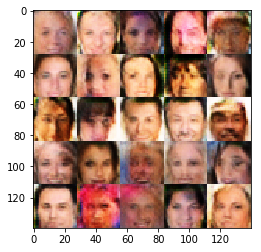

Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.5506
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4342... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.4473... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6358


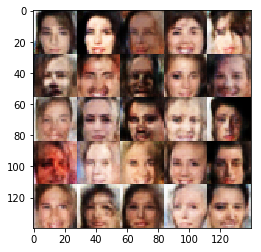

Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.6052
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6779
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.6808
Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.4951


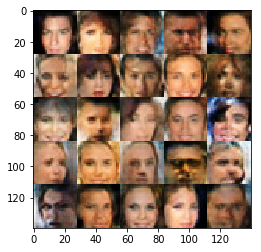

Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.5085
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.5402
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.4963
Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6349
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.6208
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.5990


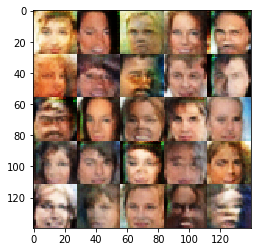

Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6448
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.6670
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 1.4930... Generator Loss: 0.5580


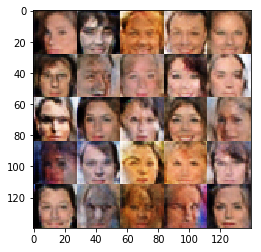

Epoch 1/1... Discriminator Loss: 1.4596... Generator Loss: 0.5164
Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.7717
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 0.5370
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.6764


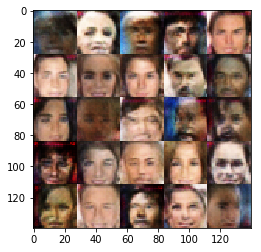

Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.5239
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6280
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.6430


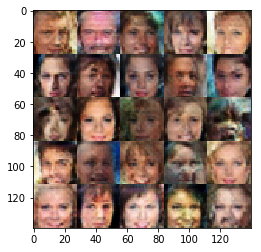

Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.5647
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.6034
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.7335
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.8111


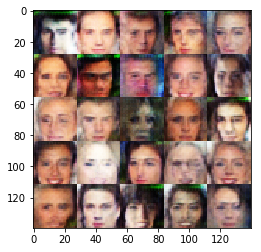

Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.5593
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.5593
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.4836
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.7769
Epoch 1/1... Discriminator Loss: 1.5012... Generator Loss: 0.6199


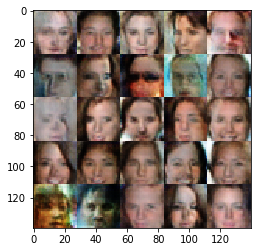

Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.6422
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.7263
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.5852
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.5662
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.5158
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.7247
Epoch 1/1... Discriminator Loss: 1.4550... Generator Loss: 0.5195
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.5581


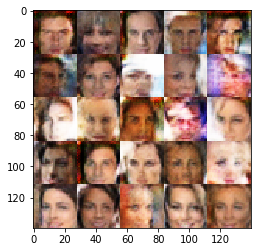

Epoch 1/1... Discriminator Loss: 1.5471... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.6861
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 1.4471... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.4284... Generator Loss: 0.6725


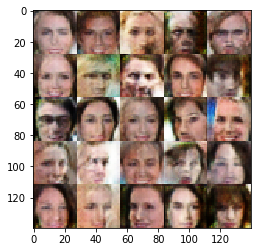

Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.8699
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.4563... Generator Loss: 0.5089
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.6079


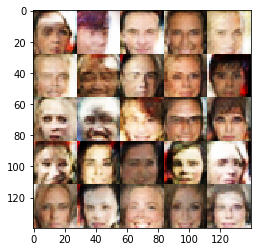

Epoch 1/1... Discriminator Loss: 1.5048... Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.5966


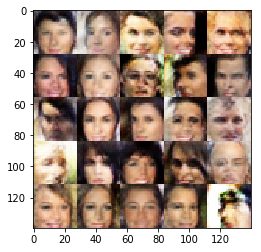

Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.4381... Generator Loss: 0.5195
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.5884


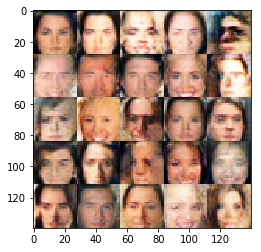

Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.6486
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.5274
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.6162
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.6837


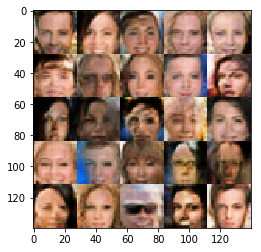

Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.4953... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.5591


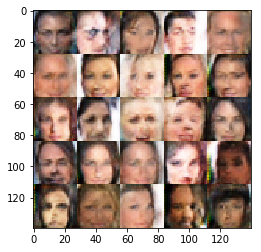

Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7243
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.6292
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.5681


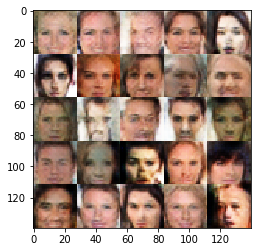

Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.5306
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.4230... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.7116
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.7027


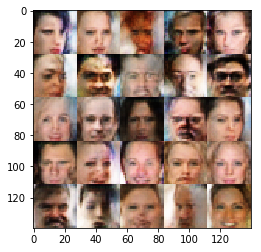

Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.6075


In [16]:
batch_size = 32
z_dim = 128
learning_rate = 0.0005
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.